In [3]:
import pandas as pd 
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='reynolddoss', api_key='NVejYWMt1A1Fe3FKAsud')
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
trainID = train['Id']
testID = test['Id']

In [8]:
#Dropping id from both
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [9]:
train.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [10]:
#look for outliers in sales price vs GrLivArea
trace = go.Scatter(x=train['GrLivArea'],y=train['SalePrice'],mode='markers')
data = [trace]
py.iplot(data, filename='outlier-scatter')

In [11]:
#Drop outliers GrLivArea >4000
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [12]:
#deleted outliers 
trace = go.Scatter(x=train['GrLivArea'],y=train['SalePrice'],mode='markers')
data = [trace]
py.iplot(data,filename='Deleted outliers')

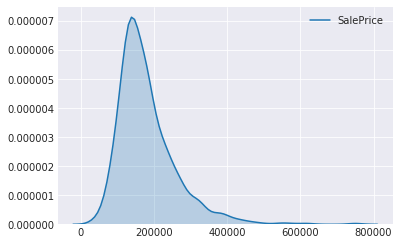

In [13]:
sns.kdeplot(train['SalePrice'],shade=True)

In [14]:
#A highly skewed independent variable may be made more symmetric with a transformation.
#using log(1+x) function on all elements to make normalized distribution 
train['SalePrice'] = np.log1p(train['SalePrice'])

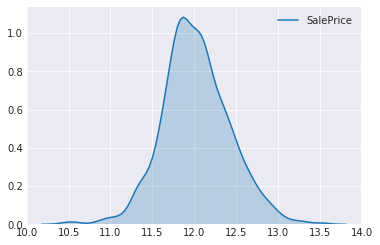

In [15]:
sns.kdeplot(train['SalePrice'],shade=True)

In [28]:
#store the saleprice in a varibale for training
saleprice = np.array(train['SalePrice'])

In [30]:
full_data = pd.concat((train,test),ignore_index=True)

In [31]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [35]:
full_data.drop(['SalePrice'],inplace=True,axis=1)

In [48]:
#dealing with missing data
full_data_na = (full_data.isnull().sum()/len(full_data)*100) 

In [50]:
#Drop columns with zero errors
full_data_na = full_data_na.drop(full_data_na[full_data_na==0].index).sort_values(ascending=False)

In [51]:
Missing_data = pd.DataFrame({"MissingRatio":full_data_na})

In [68]:
#display error bars

data = [go.Bar(
            x=Missing_data.values,
            y=Missing_data.index[:30],
            orientation = 'h'
)]

py.iplot(data, filename='Missing_horizontal-bar')

In [61]:
#Dealing with missing values w.r.t to the data description in the data description file
#PoolQC NA is no pool hence data with none is valid
full_data['PoolQC'] = full_data['PoolQC'].fillna("None")

In [69]:
#Misc Feature NA is none and hence valid 
full_data['MiscFeature'] = full_data['MiscFeature'].fillna("None")

In [62]:
#Alley NA is no access to alley hence None is valid
full_data['Alley'] = full_data['Alley'].fillna('None')

In [70]:
#Fence NA is no fence and hence None is valid
full_data['Fence'] = full_data['Fence'].fillna("None")

In [71]:
#FireplaceQu NA is no fire place and hence None is valid
full_data['FireplaceQu'] = full_data['FireplaceQu'].fillna("None")

In [72]:
full_data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
2887     50.0
2888     75.0
2889     69.0
2890     50.0
2891     60.0
2892     41.0
2893     44.0
2894     69.0
2895     65.0
2896     70.0
2897    140.0
2898      NaN
2899      NaN
2900     95.0
2901     88.0
2902    125.0
2903     78.0
2904     41.0
2905     58.0
2906      NaN
2907     21.0
2908     21.0
2909     80.0
2910     21.0
2911     21.0
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64